In [1]:
pip install TwitterAPI


     |████████████████████████████████| 153kB 1.5MB/s eta 0:00:01
  Created wheel for TwitterAPI: filename=TwitterAPI-2.5.10-cp37-none-any.whl size=11304 sha256=d92bd0cf5e3aa2b920d30784dfd0ad2bb2807d4ba19074c937415743af10dd44
  Stored in directory: /Users/sumedharana/Library/Caches/pip/wheels/a7/4e/0f/7d8efea448e3203cb6b10a5c5dba8a28ab7db53d7f237439c3
Successfully built TwitterAPI
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install TwitterAPI

Note: you may need to restart the kernel to use updated packages.


In [2]:
import configparser 
from TwitterAPI import TwitterAPI
def get_twitter(config_file):
    config=configparser.ConfigParser()
    config.read(config_file)
    twitter=TwitterAPI(config.get('twitter', 'consumer_key'),
                   config.get('twitter', 'consumer_secret'),
                   config.get('twitter', 'access_token'),
                   config.get('twitter', 'access_token_secret'))
    return twitter
twitter=get_twitter('twitter.cfg')
print('Established connection')

Established connection


In [3]:
dir(twitter)

['CONNECTION_TIMEOUT',
 'REST_TIMEOUT',
 'STREAMING_TIMEOUT',
 'USER_AGENT',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_endpoint',
 '_prepare_url',
 'auth',
 'proxies',
 'request']

In [4]:
help(twitter.request)

Help on method request in module TwitterAPI.TwitterAPI:

request(resource, params=None, files=None, method_override=None) method of TwitterAPI.TwitterAPI.TwitterAPI instance
    Request a Twitter REST API or Streaming API resource.
    
    :param resource: A valid Twitter endpoint (ex. "search/tweets")
    :param params: Dictionary with endpoint parameters or None (default)
    :param files: Dictionary with multipart-encoded file or None (default)
    :param method_override: Request method to override or None (default)
    
    :returns: TwitterResponse
    :raises: TwitterConnectionError



In [5]:
request=twitter.request('search/tweets',{'q':'modi'})

In [6]:
print(type(request))

<class 'TwitterAPI.TwitterAPI.TwitterResponse'>


In [7]:
dir(request)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'close',
 'get_iterator',
 'get_quota',
 'headers',
 'json',
 'response',
 'status_code',
 'stream',
 'text']

In [8]:
tweets=[r for r in request]

In [9]:
print('found %d tweets' % len(tweets))

found 15 tweets


In [10]:
a_tweets= tweets[0]

In [11]:

sorted(a_tweets.keys())

['contributors',
 'coordinates',
 'created_at',
 'entities',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'metadata',
 'place',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text',
 'truncated',
 'user']

In [12]:
print(a_tweets['text'])

RT @BJP4India: Giving India's GenNext the wings to fly, soar up and high.

From farmers to women to children, PM Modi is empowering India's…


In [13]:
a_tweets['user']

{'id': 2615878590,
 'id_str': '2615878590',
 'name': 'Radhey Shyam',
 'screen_name': 'rshyam8080',
 'location': '',
 'description': '',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 4,
 'friends_count': 66,
 'listed_count': 0,
 'created_at': 'Thu Jul 10 17:55:15 +0000 2014',
 'favourites_count': 1142,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 1063,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png',
 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_i

In [14]:
a_tweets['created_at']

'Thu Jan 23 14:52:20 +0000 2020'

In [15]:
user=a_tweets['user']
print('screen_name=%s, name=%s, location=%s' %
      (user['screen_name'], user['name'], user['location']))

screen_name=rshyam8080, name=Radhey Shyam, location=


In [18]:
screen_name = user['screen_name']
request = twitter.request('followers/list', 
                          {'screen_name': screen_name, 'count':200})
followers = [r for r in request]
        
print('found %d followers for %s' % (len(followers), screen_name))


found 4 followers for rshyam8080


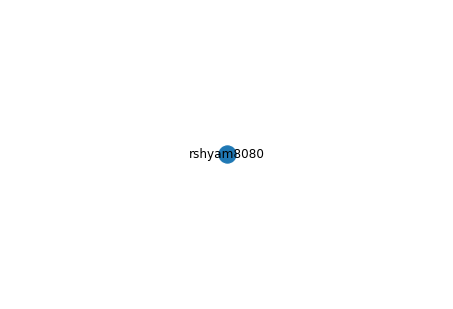

In [19]:
import networkx as nx
graph=nx.DiGraph()
graph.add_node(screen_name)
nx.draw(graph,with_labels=True)

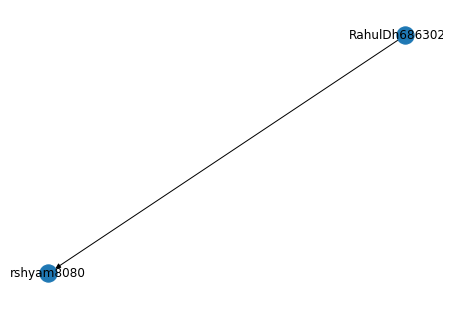

In [20]:
graph.add_edge(followers[0]['screen_name'],screen_name)
nx.draw(graph,with_labels=True)

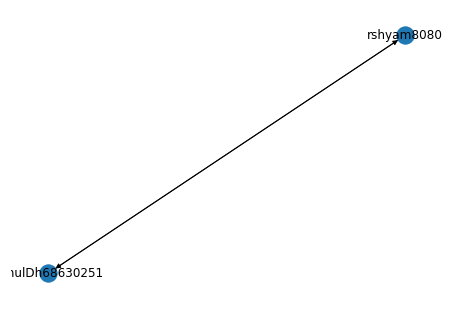

In [21]:
graph.add_edge(screen_name,followers[0]['screen_name'])
nx.draw(graph,with_labels=True)

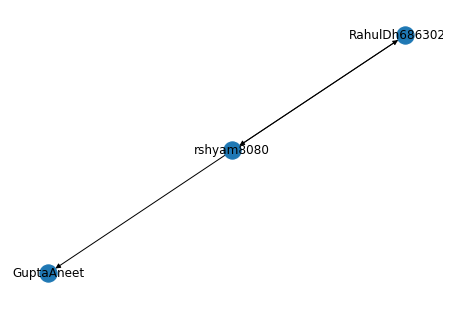

In [22]:
graph.add_edge(screen_name,followers[1]['screen_name'])
nx.draw(graph,with_labels=True)


In [23]:
timeline = [tweet for tweet in twitter.request('statuses/user_timeline',
                                              {'screen_name': screen_name,
                                               'count': 500})]
print('got %d tweets for user %s' % (len(timeline), screen_name))

got 199 tweets for user rshyam8080


In [56]:
print('\n'.join(t['text'] for t in timeline))

RT @BJP4India: हम लंबे समय तक मां भारती की सेवा करने के लिए आए लोग हैं। हमें सदियों तक ये काम करना है। और जिन आशा-आकांक्षाओं के कारण इस दल…
RT @BJP4Serampore: বিশ্বের সর্ববৃহৎ রাজনৈতিক দল ভারতীয় জনতা পার্টির নবনির্বাচিত সর্বভারতীয় সভাপতি শ্রী জে পি নাড্ডা জী কে আন্তরিক শুভেচ্…
RT @BJP4India: मेरा सौभाग्य रहा है कि यहां बैठे हुए सभी वरिष्ठ जनों के हाथ के नीचे मुझे पार्टी का काम करने का अवसर मिला है।

कभी राज्य स्तर…
RT @BJPLive: PM Shri @narendramodi is speaking now. Watch LIVE at https://t.co/XeQyzATMPr https://t.co/64M16h241k
RT @BJP4India: Nadda Ji has become our National President. We are ready to take the BJP to new heights under his leadership: Shri @AmitShah
RT @BJP4India: There are a few states where we are yet to attain electoral success and reach every booth. I call upon every worker to be re…
RT @BJP4India: Under PM Modi's aegis, we have moved ahead towards completing every promise we made to the nation.

From Article 370 to Trip…
RT @narendramodi: Speaking at the BJP headq